# Regresión lineal simple

In [1]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




data_of = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

data_de = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')


In [2]:
data_de.head()

,Date,demanda_diaria
0,2021-01-01,1.082201e+09
1,2021-01-02,1.172915e+09
2,2021-01-03,1.172285e+09
3,2021-01-04,1.323413e+09
4,2021-01-05,1.349285e+09


In [3]:
data_of.head()

,Date,oferta_diaria
0,2021-01-01,4032000.0
1,2021-01-02,4032000.0
2,2021-01-03,4032000.0
3,2021-01-04,4032000.0
4,2021-01-05,4032000.0


In [4]:
# División de los datos en conjunto de entrenamiento y prueba
X = data_de['demanda_diaria']
y = data_of['oferta_diaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


In [5]:
# Asegurarse de que X_train, y_train y X_test sean matrices de 2 dimensiones
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 13774040659004.4
Coeficiente de determinación (R²): 0.014527377775365169


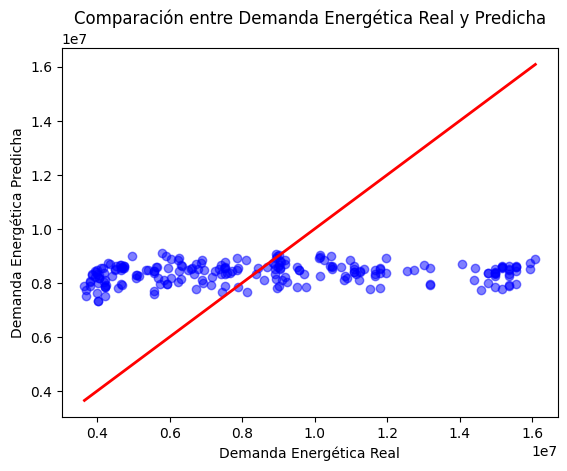

In [6]:
%matplotlib inline

# Visualización de los resultados
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Demanda Energética Real")
plt.ylabel("Demanda Energética Predicha")
plt.title("Comparación entre Demanda Energética Real y Predicha")
plt.show()

In [7]:
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# Datos de ejemplo (combina oferta y demanda)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')


# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Características y variable objetivo
X = data[['oferta_diaria']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf')
}

# Evaluación de modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados[nombre] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Mostrar resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

                            MAE           MSE        R2
Regresión Lineal   7.436675e+07  9.576012e+15  0.001815
Árbol de Decisión  8.226366e+07  1.221154e+16 -0.272906
Random Forest      7.784844e+07  1.047698e+16 -0.092100
Gradient Boosting  7.230884e+07  8.501544e+15  0.113816
SVR                7.557551e+07  1.034303e+16 -0.078137


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Datos de ejemplo (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())

# Características y variable objetivo
X = data[['oferta_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('model', GradientBoostingRegressor())  # Modelo de Gradient Boosting
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

Mejores Hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 4623480.992227555
MSE: 51469974744431.63
R2: 0.9835692955117802


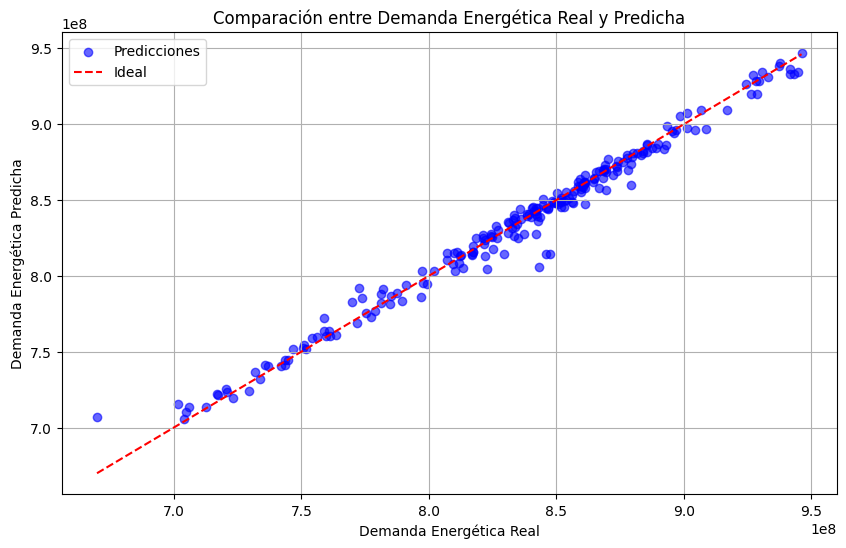

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Demanda Energética Real')
plt.ylabel('Demanda Energética Predicha')
plt.title('Comparación entre Demanda Energética Real y Predicha')
plt.legend()
plt.grid(True)
plt.show()

10:02:16 - cmdstanpy - INFO - Chain [1] start processing
10:02:17 - cmdstanpy - INFO - Chain [1] done processing


Predicción para 2025-12-30:
Demanda Estimada: 969896875.26
Intervalo de Confianza: [900553754.10, 1039947649.59]


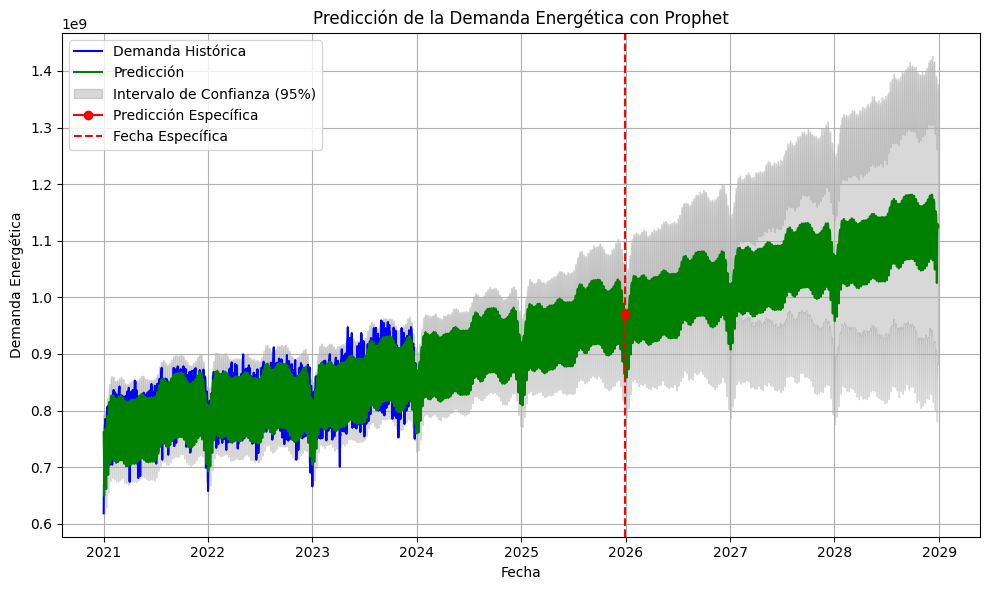

In [11]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fechas esté en el formato correcto
data['Date'] = pd.to_datetime(data['Date'])

# Preparar los datos para Prophet
data_prophet = data[['Date', 'demanda_diaria']].copy()
data_prophet.columns = ['ds', 'y']

# Crear y ajustar el modelo de Prophet
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_prophet.fit(data_prophet)

# Función para predecir la demanda en una fecha específica
def predecir_demanda(fecha_futura, anos_prediccion=5):
    """
    Genera la predicción de la demanda para una fecha futura específica.
    
    :param fecha_futura: Fecha a predecir (formato 'YYYY-MM-DD').
    :param anos_prediccion: Número de años para generar predicciones (default=5).
    """
    # Crear un DataFrame con las fechas a futuro (hasta el número de años especificado)
    dias_prediccion = 365 * anos_prediccion
    future = model_prophet.make_future_dataframe(periods=dias_prediccion)
    forecast = model_prophet.predict(future)
    
    # Buscar la predicción para la fecha dada
    prediccion = forecast[forecast['ds'] == fecha_futura]
    
    if not prediccion.empty:
        yhat = prediccion['yhat'].values[0]
        yhat_lower = prediccion['yhat_lower'].values[0]
        yhat_upper = prediccion['yhat_upper'].values[0]
        
        print(f"Predicción para {fecha_futura.date()}:")
        print(f"Demanda Estimada: {yhat:.2f}")
        print(f"Intervalo de Confianza: [{yhat_lower:.2f}, {yhat_upper:.2f}]")
        
        # Visualizar la predicción en el gráfico completo
        fig, ax = plt.subplots(figsize=(10, 6))

        # Graficar la demanda histórica
        ax.plot(data_prophet['ds'], data_prophet['y'], label='Demanda Histórica', color='blue')

        # Graficar la predicción
        ax.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='green')

        # Graficar el intervalo de confianza
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                        color='gray', alpha=0.3, label='Intervalo de Confianza (95%)')

        # Destacar la predicción en la fecha especificada
        ax.plot(fecha_futura, yhat, marker='o', color='red', label='Predicción Específica')
        ax.axvline(pd.to_datetime(fecha_futura), color='red', linestyle='--', label='Fecha Específica')

        # Personalización del gráfico
        ax.set_title('Predicción de la Demanda Energética con Prophet')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Demanda Energética')
        ax.legend(loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        print(f"No se encontró una predicción para la fecha {fecha_futura}. Verifica si la fecha está dentro del rango de predicción.")

# Ejemplo de uso
fecha_futura = '2025-12-30'  # Reemplaza con la fecha deseada
predecir_demanda(pd.to_datetime(fecha_futura), anos_prediccion=5)



In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Preparar los datos
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Seleccionar solo la demanda diaria para la serie temporal
demanda_series = data['demanda_diaria']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
split_index = int(len(demanda_series) * 0.8)
train, test = demanda_series[:split_index], demanda_series[split_index:]

# Ajustar el modelo ARIMA
# Los parámetros p, d, q se deben ajustar según los datos:
# p: número de términos autorregresivos
# d: número de diferencias para hacer la serie estacionaria
# q: número de términos de media móvil
model = ARIMA(train, order=(5, 1, 2))  # Ajuste inicial de p, d, q
model_fit = model.fit()

# Predicción
predictions = model_fit.forecast(steps=len(test))

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Demanda Diaria')
plt.title('Predicción con ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")


NameError: name 'data' is not defined

C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores Hiperparámetros: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.7}
MAE: 3045867.9383561644
MSE: 13326418432488.105
R2: 0.06120142691037411


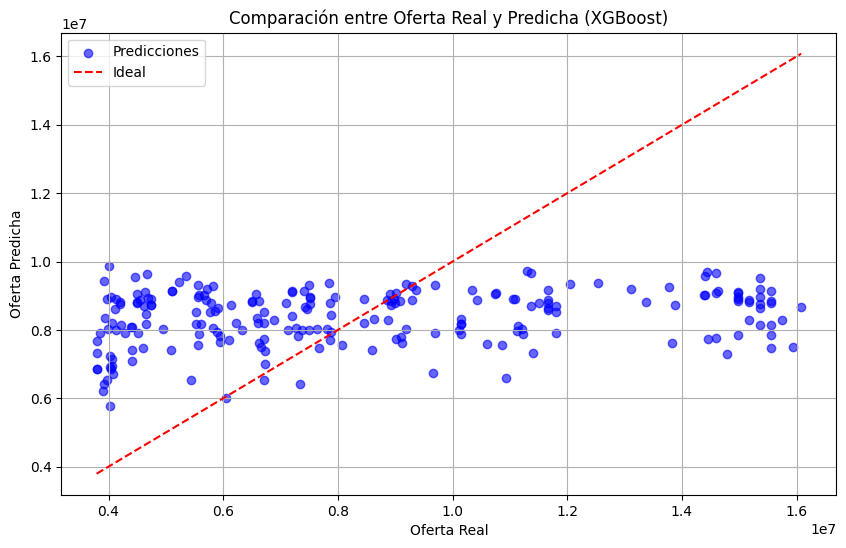

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Datos de ejemplo (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())

# Características y variable objetivo (oferta)
X = data[['demanda_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']]
y = data['oferta_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y modelo de XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('model', XGBRegressor(objective='reg:squarederror'))  # XGBoost para regresión
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Oferta Real')
plt.ylabel('Oferta Predicha')
plt.title('Comparación entre Oferta Real y Predicha (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import matplotlib.pyplot as plt

# Cargar los datos (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())

# Características y variable objetivo (oferta)
X = data[['demanda_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']]
y = data['oferta_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y modelo de LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('model', lgb.LGBMRegressor())  # LightGBM para regresión
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__reg_alpha': [0.0, 0.1, 0.5],
    'model__reg_lambda': [0.0, 0.1, 0.5]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Oferta Real')
plt.ylabel('Oferta Predicha')
plt.title('Comparación entre Oferta Real y Predicha (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 9
[LightGBM] [Info] Start training from score 15.842278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

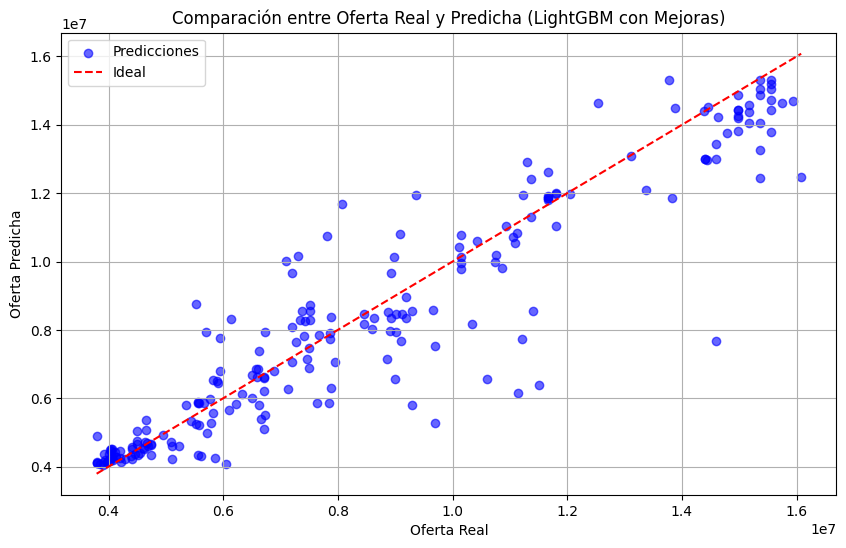

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())
data['lag_oferta'] = data['oferta_diaria'].shift(1).fillna(data['oferta_diaria'].mean())

# Aplicar transformación logarítmica en demanda y oferta
data['log_demanda'] = np.log1p(data['demanda_diaria'])
data['log_oferta'] = np.log1p(data['oferta_diaria'])

# Características y variable objetivo (oferta)
X = data[['demanda_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda', 'lag_oferta', 'log_demanda']]
y = data['log_oferta']  # Utilizamos la transformación logarítmica de la oferta

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado, PCA, y modelo de LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('pca', PCA(n_components=0.95)),  # Reducción de dimensionalidad con PCA (95% de la varianza)
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Características polinómicas de grado 2
    ('model', lgb.LGBMRegressor())
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__reg_alpha': [0.0, 0.1, 0.5],
    'model__reg_lambda': [0.0, 0.1, 0.5],
    'model__min_child_samples': [10, 20, 30],
    'model__min_child_weight': [0.001, 0.01, 0.1]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Invertir la transformación logarítmica para evaluar las métricas
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test_exp, y_pred_exp, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Oferta Real')
plt.ylabel('Oferta Predicha')
plt.title('Comparación entre Oferta Real y Predicha (LightGBM con Mejoras)')
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 9
[LightGBM] [Info] Start training from score 15.842278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

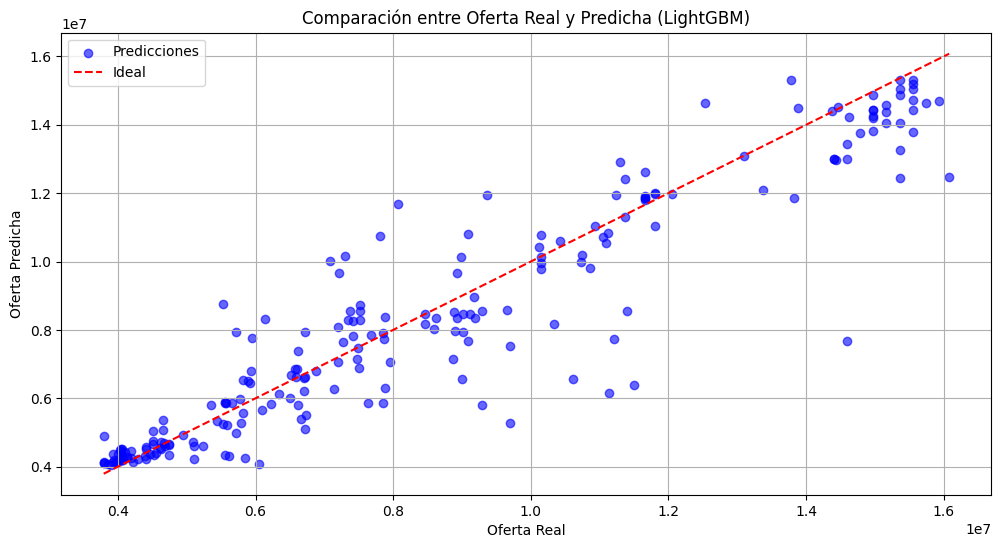

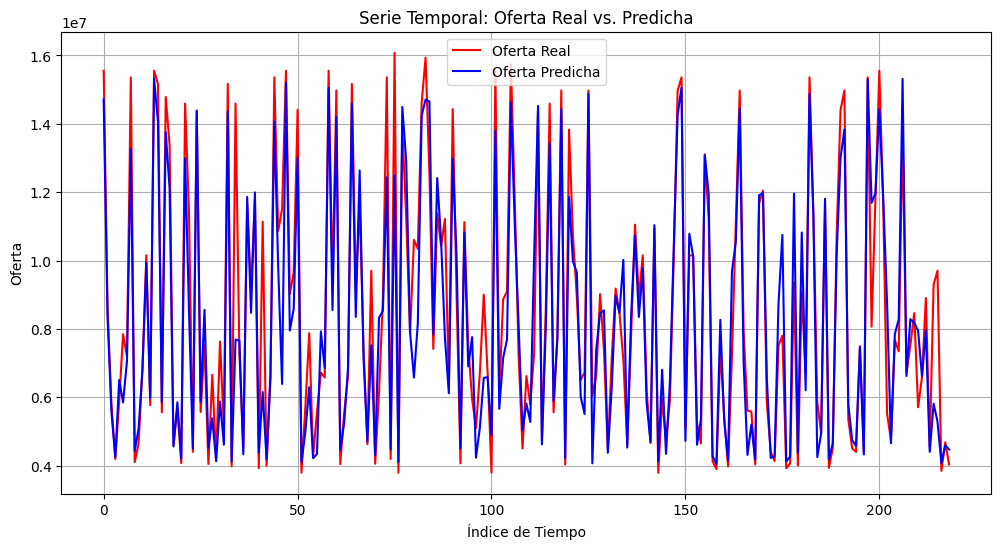

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())
data['lag_oferta'] = data['oferta_diaria'].shift(1).fillna(data['oferta_diaria'].mean())

# Aplicar transformación logarítmica en demanda y oferta
data['log_demanda'] = np.log1p(data['demanda_diaria'])
data['log_oferta'] = np.log1p(data['oferta_diaria'])

# Características y variable objetivo (oferta)
X = data[['demanda_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda', 'lag_oferta', 'log_demanda']]
y = data['log_oferta']  # Utilizamos la transformación logarítmica de la oferta

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado, PCA, y modelo de LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('pca', PCA(n_components=0.95)),  # Reducción de dimensionalidad con PCA (95% de la varianza)
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Características polinómicas de grado 2
    ('model', lgb.LGBMRegressor(
        colsample_bytree=1.0,
        learning_rate=0.05,
        max_depth=7,
        min_child_samples=20,
        min_child_weight=0.001,
        n_estimators=100,
        reg_alpha=0.5,
        reg_lambda=0.5,
        subsample=0.7
    ))
])

# Entrenar el modelo con los mejores hiperparámetros
pipeline.fit(X_train, y_train)

# Predicciones con el mejor modelo
y_pred = pipeline.predict(X_test)

# Invertir la transformación logarítmica para evaluar las predicciones
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test_exp, y_pred_exp, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Oferta Real')
plt.ylabel('Oferta Predicha')
plt.title('Comparación entre Oferta Real y Predicha (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la serie temporal de la oferta real y predicha
plt.figure(figsize=(12, 6))
plt.plot(y_test_exp.values, label='Oferta Real', color='red')
plt.plot(y_pred_exp, label='Oferta Predicha', color='blue')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Oferta')
plt.title('Serie Temporal: Oferta Real vs. Predicha')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


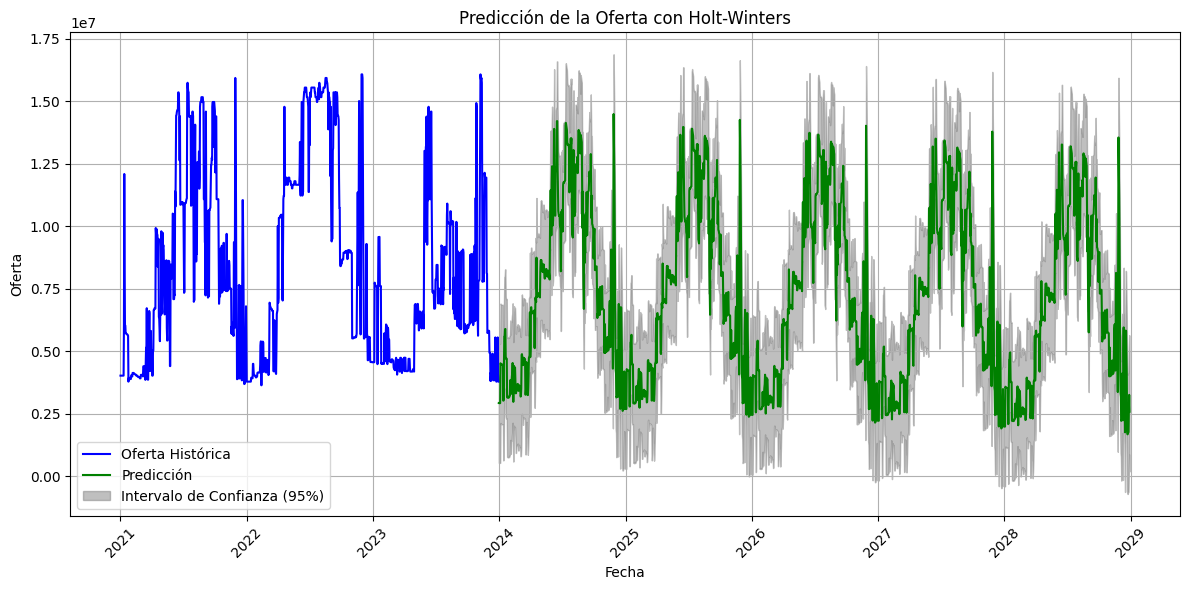

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Cargar los datos (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Convertir la columna de fecha a formato datetime
demanda['Date'] = pd.to_datetime(demanda['Date'])
oferta['Date'] = pd.to_datetime(oferta['Date'])

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Preparar los datos para el modelo
data.set_index('Date', inplace=True)
oferta_data = data['oferta_diaria']

# Ajustar el modelo de suavización exponencial (Holt-Winters)
model = ExponentialSmoothing(oferta_data, trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

# Predicción a futuro (5 años = 1825 días)
n_periods = 1825
forecast = fit.forecast(steps=n_periods)

# Calcular el intervalo de confianza del 95%
alpha = 0.05
ci_upper = forecast + 1.96 * fit.resid.std()
ci_lower = forecast - 1.96 * fit.resid.std()

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar oferta histórica
plt.plot(oferta_data.index, oferta_data, label='Oferta Histórica', color='blue')

# Graficar predicción
forecast_index = pd.date_range(start=oferta_data.index[-1], periods=n_periods, freq='D')
plt.plot(forecast_index, forecast, label='Predicción', color='green')

# Graficar intervalos de confianza
plt.fill_between(forecast_index, ci_lower, ci_upper, color='gray', alpha=0.5, label='Intervalo de Confianza (95%)')

# Configuración de la gráfica
plt.xlabel('Fecha')
plt.ylabel('Oferta')
plt.title('Predicción de la Oferta con Holt-Winters')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
